In [15]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import random

In [16]:
data_path = "data/coco_nao/bbox.json"

with open(data_path) as f:
    data = json.load(f)

print(data.keys())

dict_keys(['info', 'licences', 'images', 'annotations', 'categories'])


The bounding boxes and categories for a certain object can be found in annotations.

In [17]:
print(data['annotations'][0])

{'segmentation': [], 'area': 20048, 'iscrowd': 0, 'image_id': 3, 'bbox': [410, 99, 112, 179], 'keypoints': [], 'num_keypoints': 0, 'category_id': 1, 'id': 0}


In [18]:
print(data['categories'])

[{'id': 0, 'name': 'Football', 'supercategory': 'default', 'keypoints': [], 'skeleton': []}, {'id': 1, 'name': 'Nao_Robot', 'supercategory': 'default', 'keypoints': [], 'skeleton': []}]


In [19]:
print(data['images'][0])

{'id': 1, 'width': 640.0, 'height': 480.0, 'file_name': 'camera_1.png'}


A dictionary for the occurences of catgeories by name and number

In [20]:
occurences_categories = defaultdict(int)
occurences_categories_names = defaultdict(int)

for annotation in data['annotations']:
    for category in data['categories']:
        if category['id'] == annotation['category_id']:
            occurences_categories_names[category['name']] += 1
            break

    occurences_categories[annotation['category_id']] += 1

occurences_categories = sorted(occurences_categories.items(), key=lambda x: x[1], reverse=True)
occurences_categories_names = sorted(occurences_categories_names.items(), key=lambda x: x[1], reverse=True)

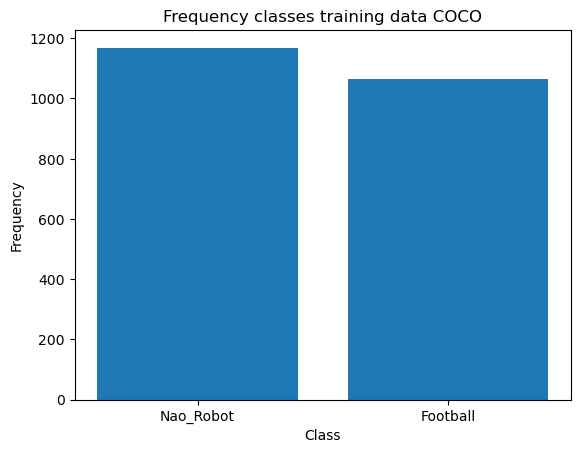

In [21]:
keys = [x[0] for x in occurences_categories_names]
values = [x[1] for x in occurences_categories_names]

# plt.figure(figsize=(6,6))
plt.bar(keys, values)
plt.xlabel('Class')
plt.ylabel('Frequency')
# plt.xticks(range(len(keys)), keys, rotation='vertical')
plt.title('Frequency classes training data COCO')
plt.show()

In [22]:
for category in occurences_categories_names:
    print(category)

('Nao_Robot', 1169)
('Football', 1064)


Doctionary for the annotations per class

In [23]:
annotations_per_category = defaultdict(list)

for annotation in data['annotations']:
    for category in data['categories']:
        if category['id'] == annotation['category_id']:
            # images_per_category[category['name']].append({'image_id': annotation['image_id'], 'annotation_id': annotation['id']})
            annotations_per_category[category['name']].append(annotation['id'])
            break

Only 1169 images contain a robot.

In [24]:
images = set()

for annotation in data['annotations']:
    if annotation['category_id'] == 1:
        images.add(annotation['image_id'])

empty_images = []

for image in data['images']:
    if image['id'] not in images:
        empty_images.append(image['id'])
    
print(5000 - len(empty_images))

1169


Removing data

In [25]:
# number_to_keep = 300
# number_of_least_frequent_classes = 10
# ten_least_frequent_categories = list(dict(occurences_categories_names).keys())[len(occurences_categories_names)-number_of_least_frequent_classes:len(occurences_categories_names)]
# annotations_to_remove = []

# for category in ten_least_frequent_categories:
#     if len(annotations_per_category[category]) <= number_to_keep:
#         number_to_remove = 0
#     else:
#         number_to_remove = len(annotations_per_category[category]) - number_to_keep
#     annotations_to_remove += random.sample(annotations_per_category[category], number_to_remove)

# data["annotations"] = [annotation for annotation in data["annotations"] if annotation["id"] not in annotations_to_remove]

Saving new dataset as json file.

In [26]:
# data_path = '../data/coco/annotations/instances_train2017_longtailed_300.json'

# with open(data_path, 'w') as f:
#     json.dump(data, f)

Bounding box sizes robots

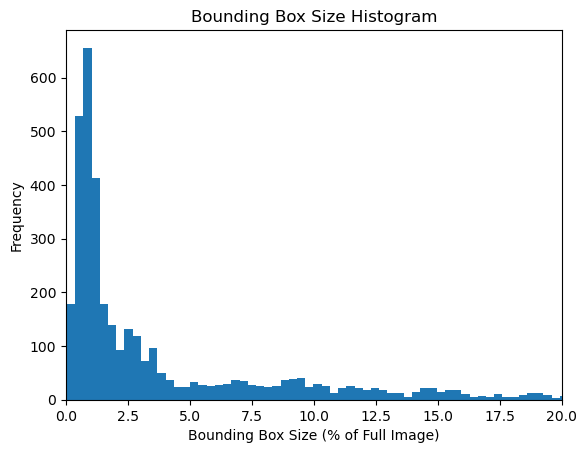

In [15]:
import os
import matplotlib.pyplot as plt

def create_bounding_box_histogram_yolo_raw(txt_dir_path: str) -> None:
    """
    Create a histogram of bounding box sizes from YOLO format text files.

    Args:
        txt_dir_path (str): Path to the directory containing YOLO format text files.

    Returns:
        None
    """
    box_sizes = []

    # Iterate over all text files in the directory
    for txt_file in os.listdir(txt_dir_path):
        if txt_file.endswith('.txt'):
            txt_file_path = os.path.join(txt_dir_path, txt_file)

            # Read the content of the text file
            with open(txt_file_path, 'r') as file:
                lines = file.readlines()

            # Extract the bounding box sizes
            for line in lines:
                bbox = line.split()
                # _, _, width, height = map(float, values[1:])  # Extract width and height
                bbox = [float(value) for value in bbox]  # Convert bbox values to float
                cat, x_center, y_center, width, height = bbox

                if (cat != 1):
                    continue
                box_size = width * 640 * height * 480

                # Add to the list
                box_sizes.append(box_size)

    # Convert sizes to percentages
    image_area = 640 * 480
    box_sizes = [(size / image_area) * 100 for size in box_sizes]
    plt.xlim(0, 20)
    # Plot the histogram
    plt.hist(box_sizes, bins=300)
    plt.title('Bounding Box Size Histogram')
    plt.xlabel('Bounding Box Size (% of Full Image)')
    plt.ylabel('Frequency')
    plt.show()


# Example usage:
txt_dir_path = 'data/raw/train/labels'
create_bounding_box_histogram_yolo_raw(txt_dir_path)


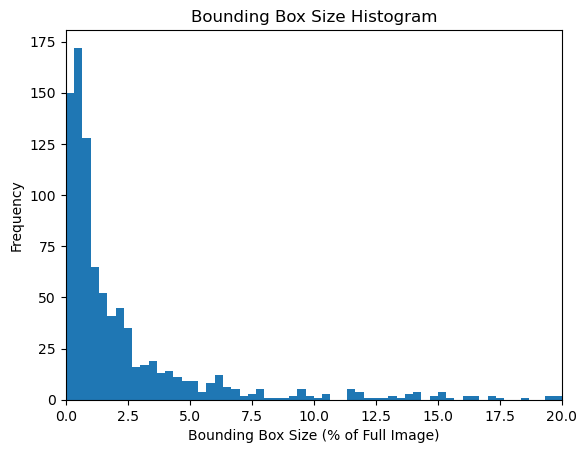

In [16]:
# Example usage:
txt_dir_path = 'data/coco_nao/train/labels'
create_bounding_box_histogram_yolo_raw(txt_dir_path)